In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('NB2.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [5]:
df.shape

(9578, 14)

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df = df.replace(' ?', np.nan)
df = df.dropna()

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols 

Index(['purpose'], dtype='object')

In [11]:
df[cat_cols].isnull().sum()

purpose    0
dtype: int64

In [12]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 purpose
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [14]:
df[num_cols].isnull().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [15]:
le=LabelEncoder()
cat_cols = [col for col in cat_cols if col in df.columns]
df[cat_cols] = df[cat_cols].apply(lambda col: le.fit_transform(col))

In [16]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [17]:
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [18]:
for col in num_cols:
    df[col] = df[col].astype(str)

In [19]:
x= df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred = nb_classifier.predict(x_test)
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.8188935281837161


In [23]:
train_accuracy = accuracy_score(y_train, nb_classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTrain Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)


Train Set Accuracy: 0.8228921952492821
Test Set Accuracy: 0.8188935281837161


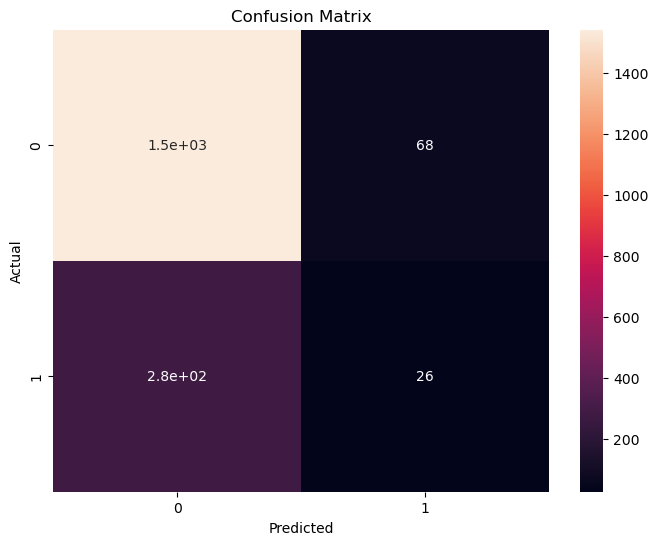

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1611
           1       0.28      0.09      0.13       305

    accuracy                           0.82      1916
   macro avg       0.56      0.52      0.51      1916
weighted avg       0.76      0.82      0.78      1916



In [91]:
class_probs = pd.DataFrame(nb_classifier.predict_proba(x_test), columns=nb_classifier.classes_)
print("\nClass Probabilities:")
print(class_probs)


Class Probabilities:
             0         1
0     0.783293  0.216707
1     0.921114  0.078886
2     0.889078  0.110922
3     0.807790  0.192210
4     0.949723  0.050277
...        ...       ...
1911  0.933567  0.066433
1912  0.913646  0.086354
1913  0.907748  0.092252
1914  0.902786  0.097214
1915  0.939389  0.060611

[1916 rows x 2 columns]


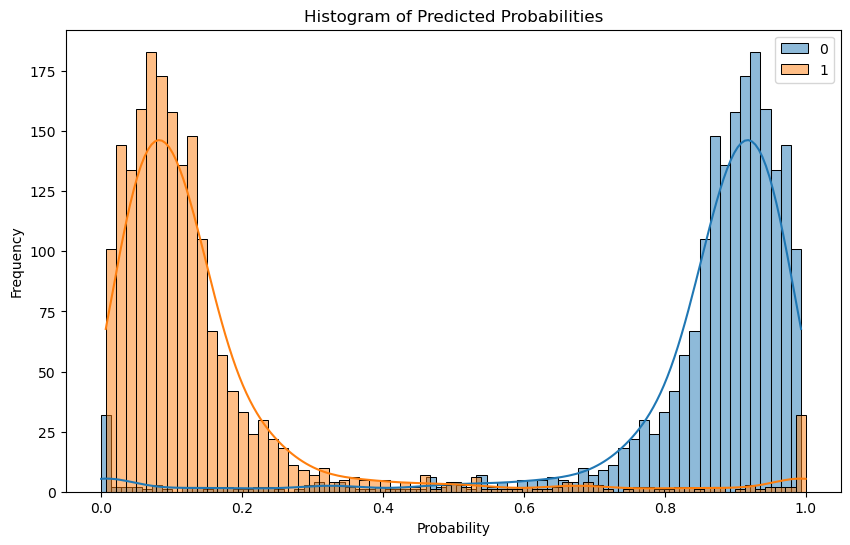

In [92]:
plt.figure(figsize=(10, 6))
for col in class_probs.columns:
    sns.histplot(class_probs[col], kde=True, label=col)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

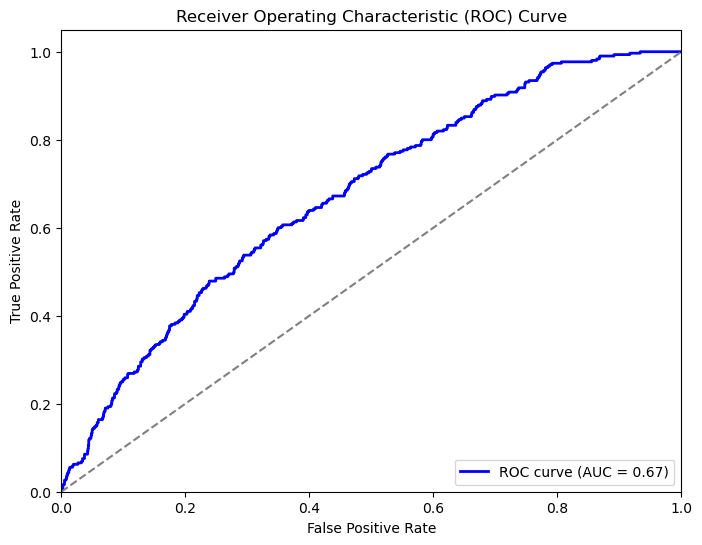

In [29]:
y_test_enc=le.fit_transform(y_test)
y_probs = nb_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test_enc, y_probs[:, 1])
auc = roc_auc_score(y_test_enc, y_probs[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
roc_auc = roc_auc_score(y_test_enc, y_probs[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6739210957454387


In [32]:
cv_auc = cross_val_score(nb_classifier, x_train, y_train, cv=5, scoring='roc_auc')
print("\nCross-validated ROC AUC:", cv_auc)


Cross-validated ROC AUC: [0.65495796 0.64291129 0.64352156 0.65679083 0.65010305]


In [33]:
cv_scores = cross_val_score(nb_classifier, x_train, y_train, cv=10)
print("\nCross-validation scores:", cv_scores)


Cross-validation scores: [0.81877445 0.83181226 0.81070496 0.8381201  0.83028721 0.82245431
 0.82506527 0.80939948 0.82506527 0.81070496]


In [34]:
print("Average cross-validation score:", np.mean(cv_scores))

Average cross-validation score: 0.8222388268013793
